In [3]:
#@title Importing the libraries
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
device = torch.device('cpu')
import numpy as np
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [4]:
from google.colab import drive
drive.mount('/content/gdrive')
# corpus = os.path.join("14ksNbln0Dcu86RokQ9T75c60_892Z8M8", GurNum-20230129T090104Z-001)
train_dataset_path= '/content/gdrive/MyDrive/Gurmukhi/train'
test_dataset_path= '/content/gdrive/MyDrive/Gurmukhi/val'


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


torch.Size([1000, 1, 32, 32]) torch.Size([1000]) <class 'torch.Tensor'>


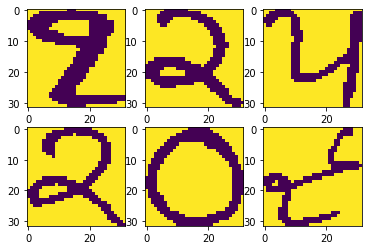

In [8]:
#@title 
variable_name = ""
input_size = 1024 #32*32 
hidden_size = 10
num_classes= 10
num_epochs = 5
learning_rate = 0.01
criterion = nn.CrossEntropyLoss()
#trans = transforms.Grayscale()
transform = transforms.Compose([transforms.Grayscale(num_output_channels=1), transforms.ToTensor(),
                    transforms.Normalize(mean=[0.5], std=[0.5])])
train_dataset = torchvision.datasets.ImageFolder(root=train_dataset_path ,
                                             transform=transform)
test_dataset = torchvision.datasets.ImageFolder(root=test_dataset_path,
                                            transform=transform)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,batch_size= batch_size,
                                          shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size = batch_size,
                                          shuffle=False)
samples, labels = next(iter(train_loader))
print(samples.shape, labels.shape, type(samples))
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(samples[i][0])
  plt.show

# train_size = len(train_dataset)
# #print(train_size)
# num_batches = (train_size//batch_size)+1
# #print(num_batches)

In [53]:
batch_size = 16
train_size = len(train_dataset)
num_batches = (train_size//batch_size)+1
#define leanrning while calling
def train_method(model,lr,regularisation):
  train_loss, correct,aterm = 0, 0, 0
  for i,(images,labels) in enumerate(train_loader):
    #images = trans(images)
    images = images.reshape(-1, 32*32).to(device)
    labels = labels.to(device)
    optimizer = torch.optim.SGD(model.parameters(), lr)
    #forward
    outputs = model(images)
    loss =  criterion(outputs, labels)
    # test_loss += loss.item()
    correct += ((outputs.argmax(1) == labels).type(torch.float).sum().item()/batch_size)
    
    #backward
    optimizer.zero_grad()
    loss.backward()
    # for j in model.parameters():
    #   print(j.grad)
    if regularisation== "L1":
      norm_l3=torch.norm(model.l5.weight).item()
      norm_l1=torch.norm(model.l1.weight).item()
      norm_l2=torch.norm(model.l2.weight).item()
      temp=norm_l3+norm_l1+norm_l2
      aterm+=(temp)
    if regularisation== "L2":
      norm_l1=torch.norm(model.l1.weight).item()**2
      norm_l2=torch.norm(model.l2.weight).item()**2
      norm_l3=torch.norm(model.l3.weight).item()**2
      norm_l4=torch.norm(model.l3.weight).item()**2
      norm_l5=torch.norm(model.l3.weight).item()**2
      temp=norm_l3+norm_l1+norm_l2+norm_l4+norm_l5
      aterm+=(temp)
    loss=loss+aterm*0.01
    train_loss += loss.item()
    optimizer.step()
    # if (i+1)%100 == 0:
    #   print(f"Batch Number: {i+1} , Test Error: \n Accuracy: {(correct/train_size)*100:>0.1f}%, Avg loss: {(test_loss/num_batches)*100:>8f} \n")
    # if (i+1)%(50000/batch_size) == 0:
    #   print(f"epoch {epoch+1}/{num_epochs}, step {i+1}/{n_total_steps},loss = {loss.item():.4f}")
    #   loss_val.append(loss.item())
  
  #print(f" batch is {i}, total loss is {test_loss}")
  # print(f" batch is {i}, total accuracy is {accuracy}")
  train_loss /= num_batches
  correct /= num_batches
  return correct, train_loss

def test_method(model):
  n_correct = 0
  n_samples = 0
  test_loss = 0
  model.eval()
  with torch.no_grad():
    for images, labels in test_loader:
      #images = trans(images)
      images = images.reshape(-1, 32*32).to(device)
      labels = labels.to(device)
      outputs = model(images)
      loss = criterion(outputs, labels)
      test_loss += loss.item()
      # print(f"outputs are : {outputs}")
      # print(f"labels are : {labels}")
      #value, index
      _, predictions = torch.max(outputs,1)
      n_samples += labels.shape[0]
      n_correct += (predictions == labels).sum().item()
  test_loss /= num_batches
  acc = 100.0 * n_correct / n_samples
  print(f'test accuracy = {acc}')
  return acc, loss

epoch is 1
 loss is 3.784
epoch is 2
 loss is 3.781
epoch is 3
 loss is 3.778
epoch is 4
 loss is 3.776
epoch is 5
 loss is 3.773
epoch is 6
 loss is 3.770
epoch is 7
 loss is 3.767
epoch is 8
 loss is 3.764
epoch is 9
 loss is 3.761
epoch is 10
 loss is 3.759
epoch is 11
 loss is 3.756
epoch is 12
 loss is 3.754
epoch is 13
 loss is 3.751
epoch is 14
 loss is 3.749
epoch is 15
 loss is 3.746
epoch is 16
 loss is 3.744
epoch is 17
 loss is 3.741
epoch is 18
 loss is 3.738
epoch is 19
 loss is 3.734
epoch is 20
 loss is 3.731
epoch is 21
 loss is 3.728
epoch is 22
 loss is 3.724
epoch is 23
 loss is 3.720
epoch is 24
 loss is 3.716
epoch is 25
 loss is 3.711
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]


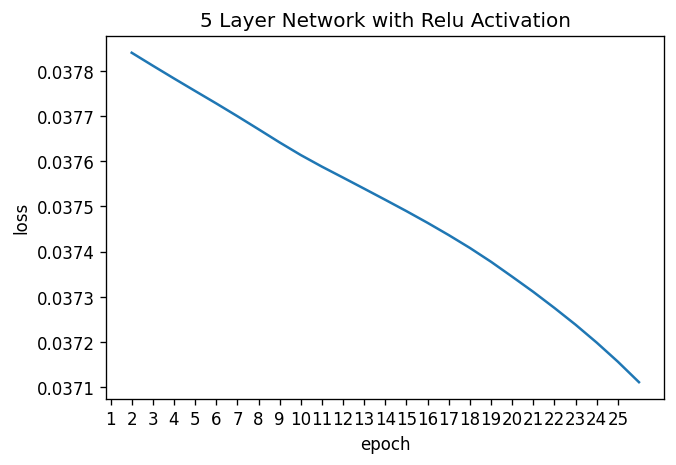

In [63]:
num_epochs = 25
loss_val = []
x_line = []
class Relu_5(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(Relu_5, self).__init__()
    self.l1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.l2 = nn.Linear(hidden_size,hidden_size)
    self.l3 = nn.Linear(hidden_size,hidden_size)
    self.l4 = nn.Linear(hidden_size,hidden_size)
    #self.softmax = nn.Softmax(dim=1)
    self.l5 = nn.Linear(hidden_size, num_classes)
  def forward(self , x):
    out = self.l1(x)
    out = self.relu(out)
    out = self.l2(out)
    out = self.relu(out)
    out = self.l3(out)
    out = self.relu(out)
    out = self.l4(out)
    out = self.relu(out)
    out = self.l5(out)
    return out

model_relu_5_l1 = Relu_5(input_size, hidden_size, num_classes).to(device)
model_relu_5_l2 = Relu_5(input_size, hidden_size, num_classes).to(device)

for epoch in range(num_epochs):
  print(f"epoch is {epoch+1}")
  accuracy, loss = train_method(model_relu_5_l1,0.2,"L1")
  print(f" loss is {loss*100:.3f}")
  loss_val.append(loss)
my_xticks = []
for i in range(len(loss_val)):
  my_xticks.append(i+1)
print(my_xticks)
plt.figure(1,dpi=120)
plt.title("5 Layer Network with Relu Activation")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.xscale("linear")
plt.yscale("linear")
x = np.array(np.arange(0, len(my_xticks), 1))
plt.xticks(x, my_xticks)
plt.plot(my_xticks,loss_val)

In [58]:
test_accuracy,test_loss = test_method(model_relu_5_l1)

test accuracy = 8.98876404494382


epoch is 1
 loss is 3.988
epoch is 2
 loss is 3.984
epoch is 3
 loss is 3.981
epoch is 4
 loss is 3.978
epoch is 5
 loss is 3.975
epoch is 6
 loss is 3.971
epoch is 7
 loss is 3.967
epoch is 8
 loss is 3.963
epoch is 9
 loss is 3.958
epoch is 10
 loss is 3.953
epoch is 11
 loss is 3.949
epoch is 12
 loss is 3.944
epoch is 13
 loss is 3.940
epoch is 14
 loss is 3.936
epoch is 15
 loss is 3.932
epoch is 16
 loss is 3.927
epoch is 17
 loss is 3.921
epoch is 18
 loss is 3.914
epoch is 19
 loss is 3.906
epoch is 20
 loss is 3.896
epoch is 21
 loss is 3.882
epoch is 22
 loss is 3.864
epoch is 23
 loss is 3.838
epoch is 24
 loss is 3.799
epoch is 25
 loss is 3.737
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]


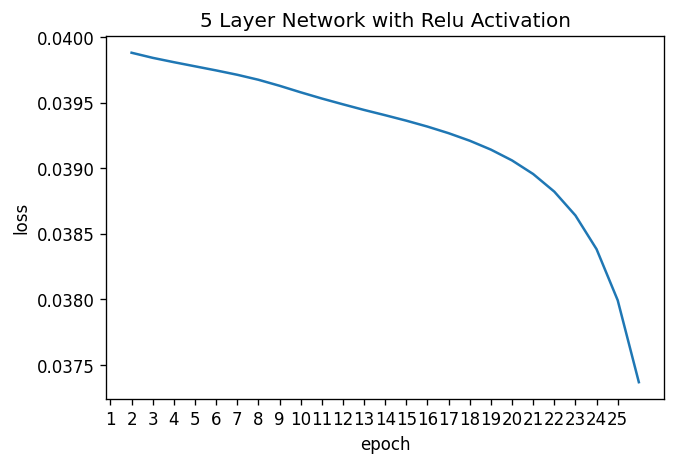

In [61]:
num_epochs = 25
loss_val = []
x_line = []
for epoch in range(num_epochs):
  print(f"epoch is {epoch+1}")
  accuracy, loss = train_method(model_relu_5_l2,0.3,"L2")
  print(f" loss is {loss*100:.3f}")
  loss_val.append(loss)
my_xticks = []
for i in range(len(loss_val)):
  my_xticks.append(i+1)
print(my_xticks)
plt.figure(1,dpi=120)
plt.title("5 Layer Network with Relu Activation")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.xscale("linear")
plt.yscale("linear")
x = np.array(np.arange(0, len(my_xticks), 1))
plt.xticks(x, my_xticks)
plt.plot(my_xticks,loss_val)

In [62]:
test_accuracy,test_loss = test_method(model_relu_5_l2)

test accuracy = 17.97752808988764
